In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\Projects\New folder (2)\PlantVillage", 
    shuffle=True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)


Found 20638 files belonging to 15 classes.


In [5]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

645

In [7]:
for image_batch, label_batch in dataset.take(1):  
  print(image_batch.shape)
  print(label_batch.numpy())  
  print(image_batch[0])       
  print(image_batch[0].numpy) 
  print(image_batch[0].shape)


(32, 256, 256, 3)
[12  9  2  7  5 11 11  9  4  8 12 10  8 12  3  5 12  5 10 12 10  6  9  5
  7  1  7  9  5  7  9  8]
tf.Tensor(
[[[146. 152. 142.]
  [146. 152. 142.]
  [146. 152. 142.]
  ...
  [137. 141. 140.]
  [138. 142. 141.]
  [139. 143. 142.]]

 [[144. 150. 140.]
  [144. 150. 140.]
  [143. 149. 139.]
  ...
  [137. 141. 140.]
  [138. 142. 141.]
  [139. 143. 142.]]

 [[141. 147. 137.]
  [141. 147. 137.]
  [141. 147. 137.]
  ...
  [136. 140. 139.]
  [138. 142. 141.]
  [139. 143. 142.]]

 ...

 [[126. 131. 124.]
  [124. 129. 122.]
  [121. 126. 119.]
  ...
  [121. 125. 124.]
  [120. 124. 123.]
  [108. 112. 111.]]

 [[123. 128. 121.]
  [120. 125. 118.]
  [117. 122. 115.]
  ...
  [130. 134. 133.]
  [130. 134. 133.]
  [115. 119. 118.]]

 [[115. 120. 113.]
  [114. 119. 112.]
  [113. 118. 111.]
  ...
  [137. 141. 140.]
  [137. 141. 140.]
  [121. 125. 124.]]], shape=(256, 256, 3), dtype=float32)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
ar

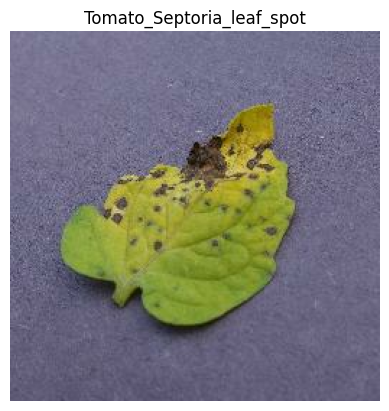

In [8]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.axis("off")    
  plt.title(class_names[label_batch[0]])    


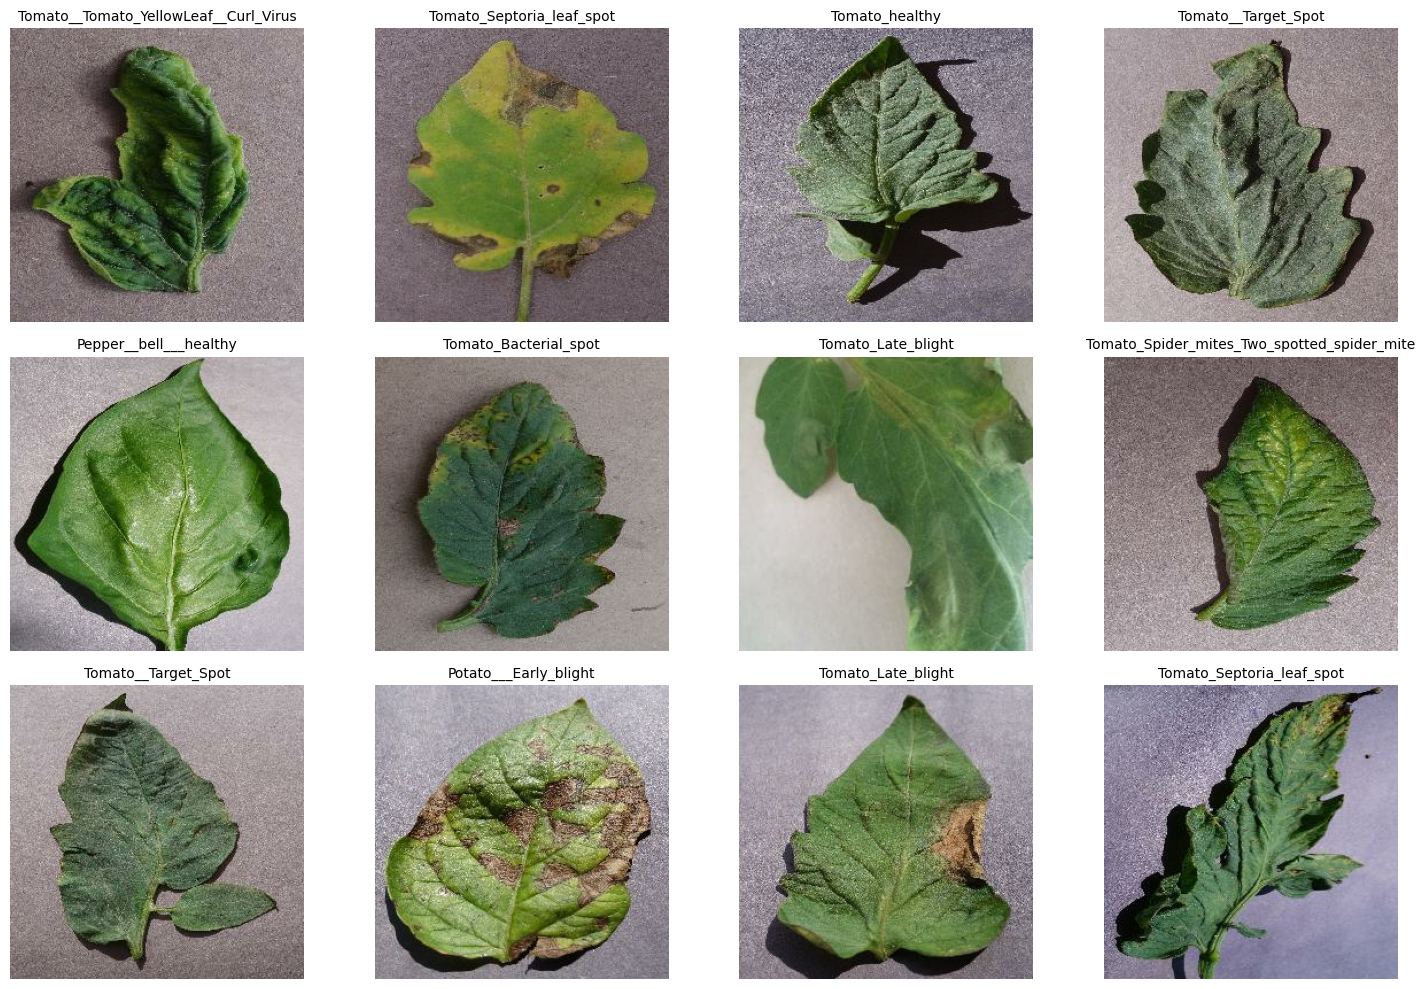

In [9]:
num_images = 12

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for image_batch, label_batch in dataset.take(1):
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(image_batch[i].numpy().astype("uint8"))
        ax.axis("off")
        ax.set_title(class_names[label_batch[i].numpy()], fontsize=10)

plt.tight_layout()
plt.show()


In [10]:
plt.figure(figsize=(10, 10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        ax.imshow(image_batch[i].numpy().astype("uint8"))
        ax.axis("off")
        ax.set_title(class_names[label_batch[i].numpy()], fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
len(dataset)

645

In [12]:
train_size =0.8   
len(dataset)*train_size    

516.0

In [13]:
train_ds = dataset.take(516)
len(train_ds)              

516

In [14]:
test_ds = dataset.skip(516)     
len(test_ds)

129

In [15]:
val_size=0.1
len(dataset)*val_size

64.5

In [16]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [17]:
test_ds = test_ds.skip(64)
len(test_ds)

65

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

516

In [21]:
len(val_ds)

64

In [22]:
len(test_ds)

65

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:

IMAGE_SIZE = 256

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])



In [25]:
# data augmentaion

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    epochs = 15,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
516/516 [==============================] - 64s 124ms/step - loss: 0.6529 - accuracy: 0.7754 - val_loss: 0.4582 - val_accuracy: 0.8481
Epoch 2/15
516/516 [==============================] - 59s 114ms/step - loss: 0.4526 - accuracy: 0.8424 - val_loss: 0.3701 - val_accuracy: 0.8892
Epoch 3/15
516/516 [==============================] - 60s 117ms/step - loss: 0.3360 - accuracy: 0.8840 - val_loss: 0.2801 - val_accuracy: 0.9019
Epoch 4/15
516/516 [==============================] - 59s 115ms/step - loss: 0.2631 - accuracy: 0.9089 - val_loss: 0.3048 - val_accuracy: 0.9023
Epoch 5/15
516/516 [==============================] - 61s 118ms/step - loss: 0.2171 - accuracy: 0.9253 - val_loss: 0.2565 - val_accuracy: 0.9067
Epoch 6/15
516/516 [==============================] - 58s 112ms/step - loss: 0.2006 - accuracy: 0.9299 - val_loss: 0.1930 - val_accuracy: 0.9360
Epoch 7/15
516/516 [==============================] - 62s 120ms/step - loss: 0.1798 - accuracy: 0.9365 - val_loss: 0.1802 - val_ac

In [31]:
model.save("model.h5")

In [32]:
scores = model.evaluate(test_ds)

65/65 [==============================] - 46s 46ms/step - loss: 0.1719 - accuracy: 0.9471


In [33]:
scores

[0.17186735570430756, 0.9471153616905212]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 516}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
history.history["accuracy"]

[0.7754360437393188,
 0.8424176573753357,
 0.8839631676673889,
 0.9089147448539734,
 0.9253270626068115,
 0.9298691749572754,
 0.9365310072898865,
 0.9462209343910217,
 0.9570615291595459,
 0.9652373790740967,
 0.9623909592628479,
 0.9678415656089783,
 0.9705063104629517,
 0.9657824635505676,
 0.976017415523529]

In [38]:
# plot the history stuff in matplotlib chart
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


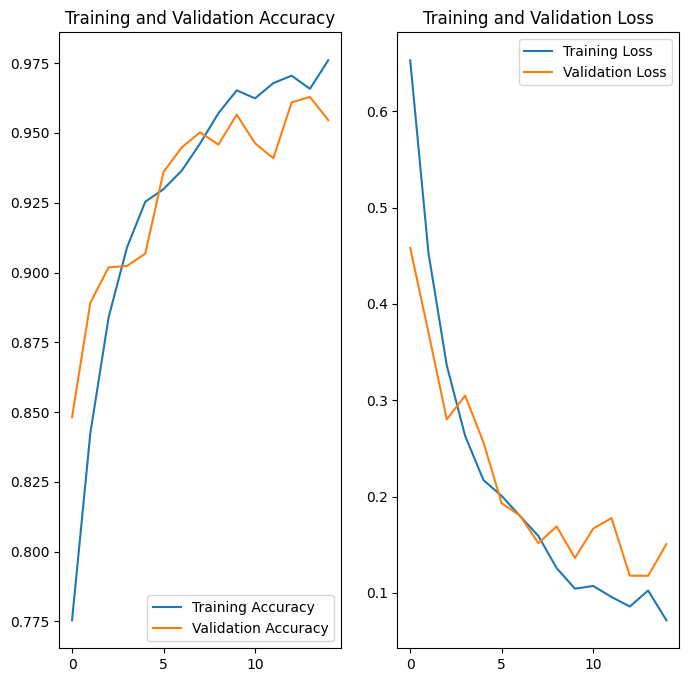

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(15), loss, label='Training Loss')
plt.plot(range(15), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [41]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

first image to predict
actual label: Tomato_Leaf_Mold
1/1 [==============================] - 0s 200ms/step
predicted label: Tomato_Leaf_Mold


In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


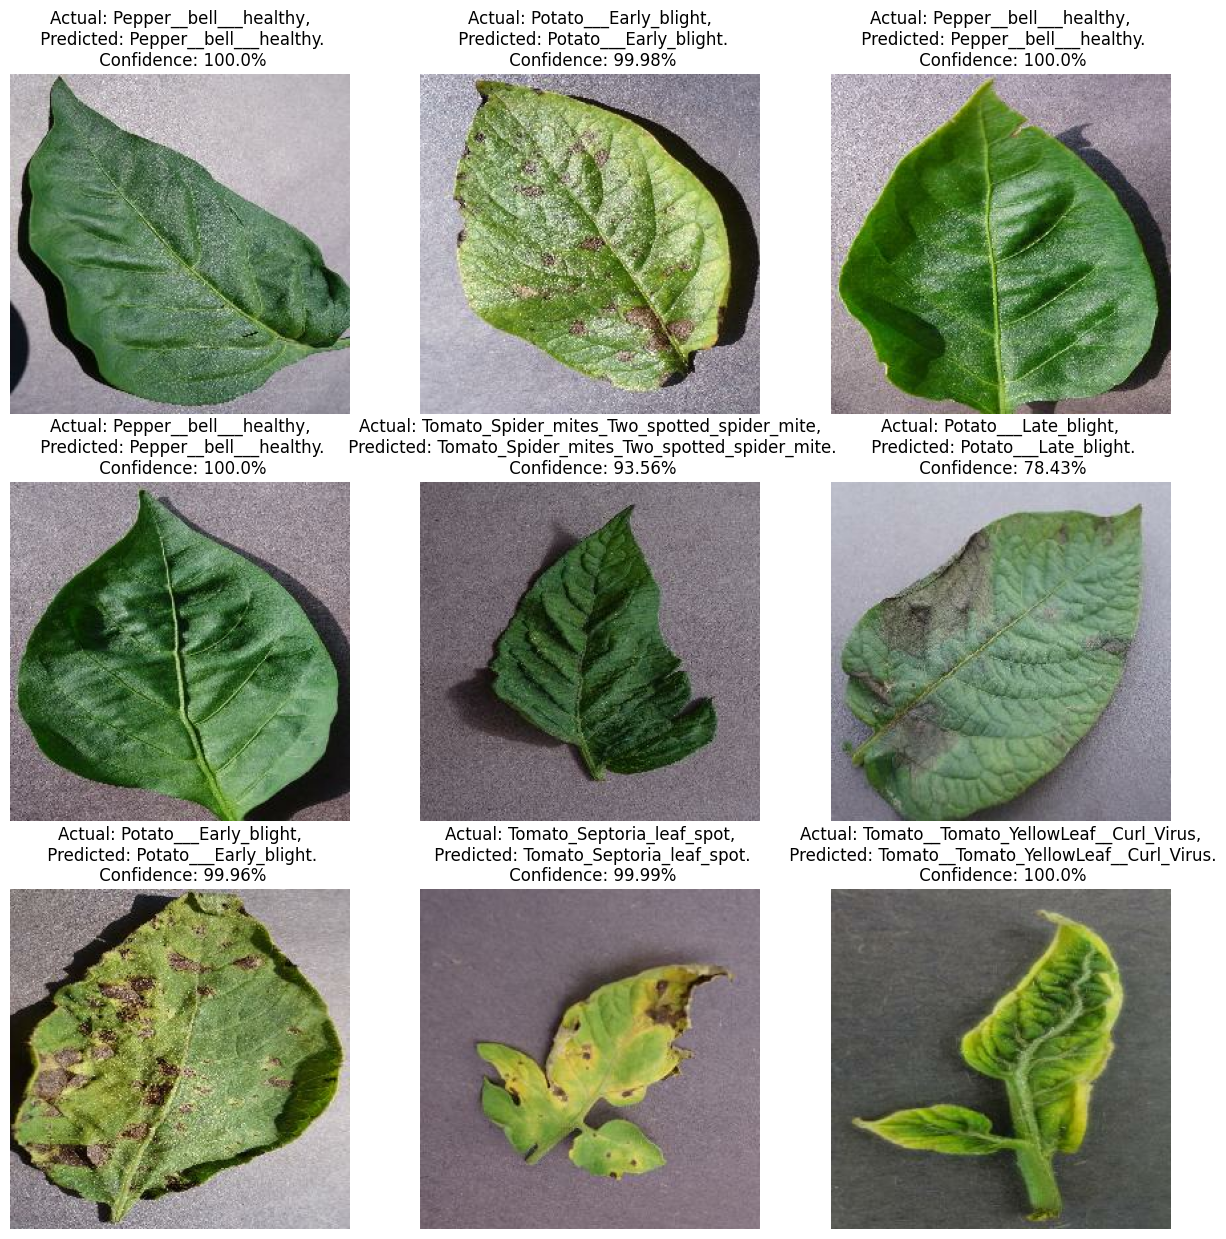

In [43]:
# running inference for a few samples

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")